## Final Project Submission

Please fill out:
* Student name: MARTIN MURIMI
* Student pace: self paced / part time / full time: HYBRID
* Scheduled project review date/time: 
* Instructor name: ANTONY
* Blog post URL: https://github.com/Murimi49


### MODELLING DATA

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [2]:
df= pd.read_csv('data\Traffic_Crashes_-_Crashes_20240828.csv', low_memory=False).drop_duplicates()

In [3]:
main_label = 'is_injury'
df[main_label] = (df['INJURIES_TOTAL']>0).astype(int)
# convert columns to string
for col in ['POSTED_SPEED_LIMIT', 'LANE_CNT', 'NUM_UNITS']:
    df[col] = df[col].astype(str)
# convert CRASH_DATE and extract features
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], format="%m/%d/%Y %I:%M:%S %p")
df['CRASH_YEAR'] = df['CRASH_DATE'].dt.year.astype(str)
df['DAY'] = df['CRASH_DATE'].dt.day_name()
df['HOUR'] = df['CRASH_DATE'].dt.hour.apply(lambda x: str(3*round(1/3*x)))
df['CRASH_DAY_HOUR'] = df['DAY']+', '+df['HOUR']
# set up the rare label encoder limiting number of categories to max_n_categories
for col in ['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 
            'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 
            'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 
            'SEC_CONTRIBUTORY_CAUSE', 'STREET_NAME', 'NUM_UNITS', 'CRASH_YEAR', 'CRASH_DAY_HOUR']:
    df[col] = df[col].fillna('UNKNOWN')
    from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='if_binary')
encoded_cols = encoder.fit_transform(df[[col]])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names([col]))

df = df.drop(columns=[col])
df = pd.concat([df, encoded_df], axis=1)
# finally, drop unused columns
cols2drop = ['INJURIES_TOTAL', 'CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'REPORT_TYPE', 'CRASH_TYPE', 
             'DATE_POLICE_NOTIFIED', 'CRASH_DATE', 'DAY', 'HOUR', 'STREET_NO', 'STREET_DIRECTION', 'BEAT_OF_OCCURRENCE', 
             'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 
             'MOST_SEVERE_INJURY', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 
             'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 
             'LATITUDE', 'LONGITUDE', 'LOCATION']
df = df.drop(cols2drop, axis=1)
print(df.shape)
df.sample(5).T

(867100, 85)


,25328,694937,135650,523035,23080
POSTED_SPEED_LIMIT,35,30,30,30,30
TRAFFIC_CONTROL_DEVICE,NO CONTROLS,TRAFFIC SIGNAL,TRAFFIC SIGNAL,TRAFFIC SIGNAL,NO CONTROLS
DEVICE_CONDITION,NO CONTROLS,FUNCTIONING PROPERLY,FUNCTIONING PROPERLY,FUNCTIONING PROPERLY,NO CONTROLS
WEATHER_CONDITION,CLEAR,RAIN,CLEAR,RAIN,CLEAR
LIGHTING_CONDITION,DAYLIGHT,"DARKNESS, LIGHTED ROAD",DAYLIGHT,DAYLIGHT,DAYLIGHT
FIRST_CRASH_TYPE,PEDALCYCLIST,ANGLE,REAR END,REAR END,TURNING
TRAFFICWAY_TYPE,DIVIDED - W/MEDIAN (NOT RAISED),T-INTERSECTION,NOT DIVIDED,NOT DIVIDED,DIVIDED - W/MEDIAN (NOT RAISED)
LANE_CNT,nan,nan,nan,4.0,nan
ALIGNMENT,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL
ROADWAY_SURFACE_COND,DRY,WET,DRY,WET,DRY


In [4]:
y = df[main_label].values.reshape(-1,)
X = df.drop([main_label], axis=1)
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols_idx = [list(X.columns).index(c) for c in cat_cols]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


((650325, 84), (216775, 84), (650325,), (216775,))

In [5]:
from sklearn.utils.class_weight import compute_class_weight
# add class weights to handle imbalanced classes
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
print(class_weights)

{0: 0.5810467910974509, 1: 3.5846378569066255}


In [6]:
!pip install catboost
from catboost import Pool, CatBoostClassifier
train_pool = Pool(X_train, 
                  y_train, 
                  cat_features=cat_cols_idx)
test_pool = Pool(X_test,
                 y_test,
                 cat_features=cat_cols_idx)

In [7]:
model = CatBoostClassifier(iterations=100,
                           depth=5,
                           border_count=20,
                           l2_leaf_reg=0.4,
                           learning_rate=0.4,
                           class_weights=class_weights,
                           verbose=0)


In [8]:
#train the models
from sklearn.metrics import roc_auc_score
model.fit(train_pool)

# make the prediction using the resulting model
y_train_pred = model.predict_proba(train_pool)[:,1]
y_test_pred = model.predict_proba(test_pool)[:,1]
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)
print(f"ROC AUC score for train {round(roc_auc_train,4)}, and for test {round(roc_auc_test,4)}")
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# calculating the baseline ROC AUC score to test
roc_auc_baseline = roc_auc_score(y_test, [np.mean(y_train)]*len(y_test))
print(roc_auc_baseline)

0.5


In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.0f'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



Accuracy: 0.6340
F1 Score: 0.1936


NameError: name 'itertools' is not defined

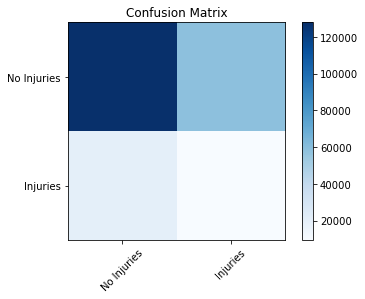

In [ ]:
# Calculate accuracy and F1 score
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, (y_test_pred > 0.5))
f1 = f1_score(y_test, (y_test_pred > 0.5))

# Display accuracy and F1 score
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Get the confusion matrix
cm = confusion_matrix(y_test, (y_test_pred > 0.5))

# Plot the confusion matrix
class_names = ['No Injuries', 'Injuries'] 
plot_confusion_matrix(cm, class_names)